## [作業重點]
目前你應該已經要很清楚資料集中，資料的型態是什麼樣子囉！包含特徵 (features) 與標籤 (labels)。因此要記得未來不管什麼專案，必須要把資料清理成相同的格式，才能送進模型訓練。
今天的作業開始踏入決策樹這個非常重要的模型，請務必確保你理解模型中每個超參數的意思，並試著調整看看，對最終預測結果的影響為何

## 作業

1. 試著調整 DecisionTreeClassifier(...) 中的參數，並觀察是否會改變結果？
2. 改用其他資料集 (boston, wine)，並與回歸模型的結果進行比較

In [79]:
from sklearn import datasets, metrics

# 如果是分類問題，請使用 DecisionTreeClassifier，若為回歸問題，請使用 DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split

In [80]:
# 讀取鳶尾花資料集
iris = datasets.load_iris()

# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.25, random_state=4)

# 建立模型
clf = DecisionTreeClassifier(criterion = 'gini',max_depth = None, min_samples_split = 3, min_samples_leaf = 2 )

# 訓練模型
clf.fit(x_train, y_train)

# 預測測試集
y_pred = clf.predict(x_test)

In [81]:
acc = metrics.accuracy_score(y_test, y_pred)
print("Acuuracy: ", acc)

Acuuracy:  0.9736842105263158


In [82]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [83]:
print("Feature importance: ", clf.feature_importances_)

Feature importance:  [0.01341996 0.00705408 0.54685325 0.43267271]


In [84]:
import pandas as pd
iris=datasets.load_iris()
df=pd.DataFrame(iris.data, columns=iris.feature_names)
y=iris.target
dtree=DecisionTreeClassifier(criterion = 'gini',max_depth = None, min_samples_split = 3, min_samples_leaf = 2 )
dtree.fit(df,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

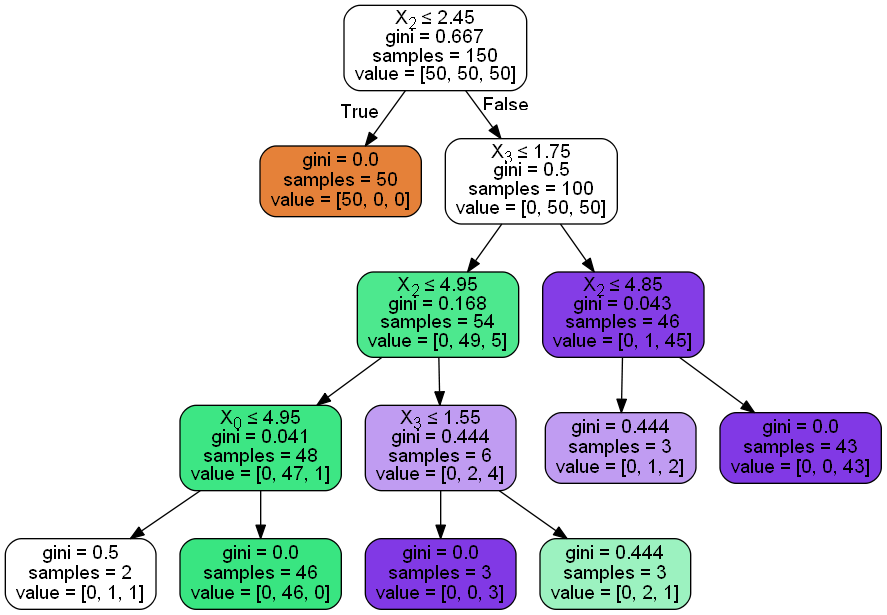

In [85]:
# 畫出決策樹
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [86]:
# 開始預測
from sklearn.metrics import accuracy_score
predict = clf.predict(x_test)
print("預測:", predict)
print("正確標籤:", y_test)
print("正確率: ", accuracy_score(y_test, predict) * 100, "%")

預測: [2 0 2 2 2 1 2 0 0 2 0 0 0 1 2 0 1 0 0 2 0 2 1 0 0 0 0 0 0 2 1 0 2 0 1 2 2
 1]
正確標籤: [2 0 2 2 2 1 1 0 0 2 0 0 0 1 2 0 1 0 0 2 0 2 1 0 0 0 0 0 0 2 1 0 2 0 1 2 2
 1]
正確率:  97.36842105263158 %


In [87]:
# 確認一下分類錯誤
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predict)
pd.DataFrame(cm)

,0,1,2
0,18,0,0
1,0,7,1
2,0,0,12


列是你的正確標籤，行則是你的預測，當你的列數字不等於行數字的時候就是分
類錯誤的情況

2. 改用其他資料集 (boston, wine)，並與回歸模型的結果進行比較

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# 讀取boston資料集
boston = datasets.load_boston()

df = pd.DataFrame(boston['data'], columns = boston['feature_names'])
df['target'] = boston['target']

df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


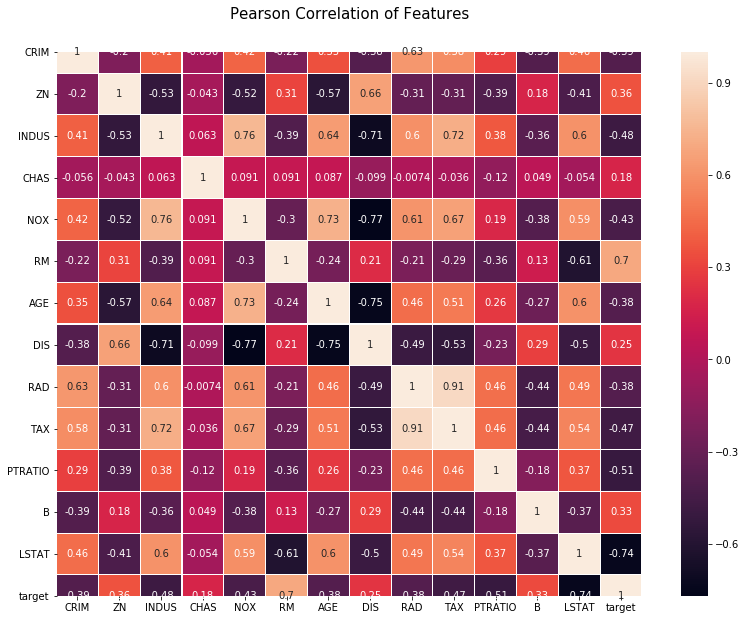

In [89]:
plt.figure(figsize=(14,10))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df.astype(float).corr(),linewidths=0.1,
square=True, linecolor='white', annot=True)

In [90]:
# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.1)

from sklearn.tree import DecisionTreeRegressor
regr = DecisionTreeRegressor(max_depth = 3)
regr.fit(x_train, y_train.astype(int))

# 建立模型
clf = DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
max_leaf_nodes=None,
min_samples_leaf=1, min_samples_split=2,
min_weight_fraction_leaf=0.0, presort=False, random_state=None,
splitter='best')

# 訓練模型
clf.fit(x_train, y_train.astype('int'))

# 預測測試集
y_pred = clf.predict(x_test)

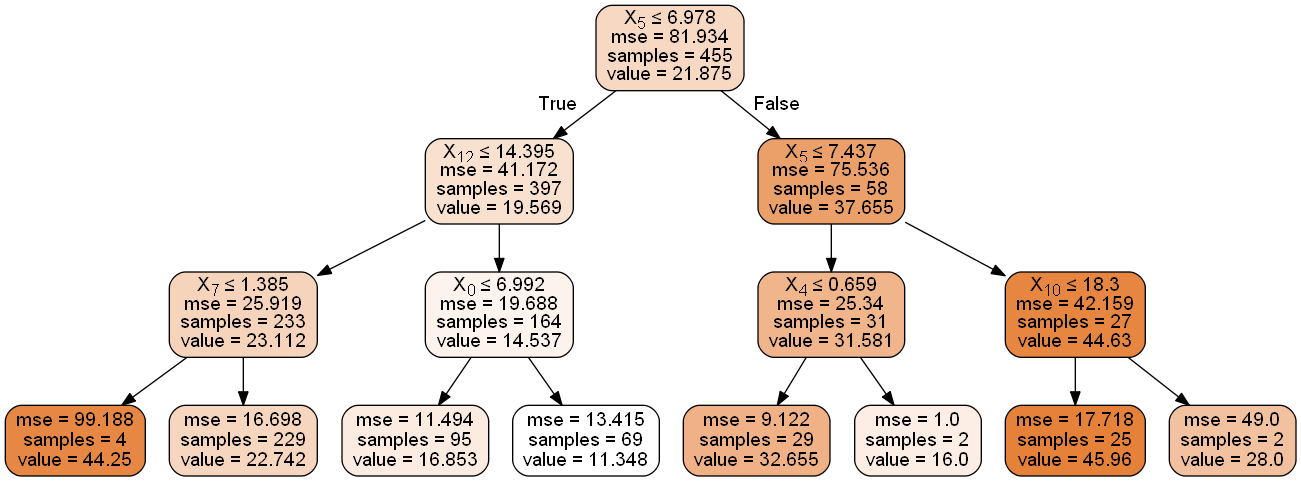

In [91]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [92]:
# 我們可以直接使用 numpy 來實現兩個 list 的直接相減
import numpy as np
predict = regr.predict(x_test)
print("實際的價錢:", y_test)
print("預測的價錢:", predict)
interval = np.subtract(predict, y_test)
print("差異:", interval)

實際的價錢: [21.2 31.1 25.  21.5 23.1 30.5 11.7 22.7 34.9 13.3 19.2 42.8 20.1  5.6
 23.7 15.6 24.7 19.7 22.8 30.1 18.6 23.9 16.3 30.3 15.4 22.  14.6 18.5
 27.1 12.7 20.9 22.6 22.  20.8 41.3 20.9 33.2 19.3 14.5 50.  14.8 46.
 34.7 18.  32.  19.9 50.  37.2 18.9 13.4 50. ]
預測的價錢: [22.74235808 22.74235808 32.65517241 22.74235808 22.74235808 22.74235808
 11.34782609 22.74235808 32.65517241 16.85263158 22.74235808 28.
 11.34782609 11.34782609 22.74235808 16.85263158 22.74235808 22.74235808
 22.74235808 22.74235808 22.74235808 22.74235808 11.34782609 32.65517241
 11.34782609 22.74235808 16.85263158 22.74235808 22.74235808 16.85263158
 22.74235808 22.74235808 22.74235808 22.74235808 22.74235808 22.74235808
 32.65517241 22.74235808 22.74235808 45.96       16.85263158 45.96
 32.65517241 16.85263158 22.74235808 22.74235808 44.25       32.65517241
 22.74235808 11.34782609 32.65517241]
差異: [  1.54235808  -8.35764192   7.65517241   1.24235808  -0.35764192
  -7.75764192  -0.35217391   0.04235808  -2.24482

In [93]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [94]:
print("Feature importance: ", clf.feature_importances_)

Feature importance:  [0.0400603  0.         0.         0.         0.01716588 0.62878011
 0.         0.06014874 0.         0.         0.01975697 0.
 0.23408801]


In [95]:
import pandas as pd
boston=datasets.load_wine()
df=pd.DataFrame(boston.data, columns=boston.feature_names)
y=boston.target
boston_dtree=DecisionTreeClassifier(criterion = 'gini',max_depth = None, min_samples_split = 3, min_samples_leaf = 2 )
boston_dtree.fit(df,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

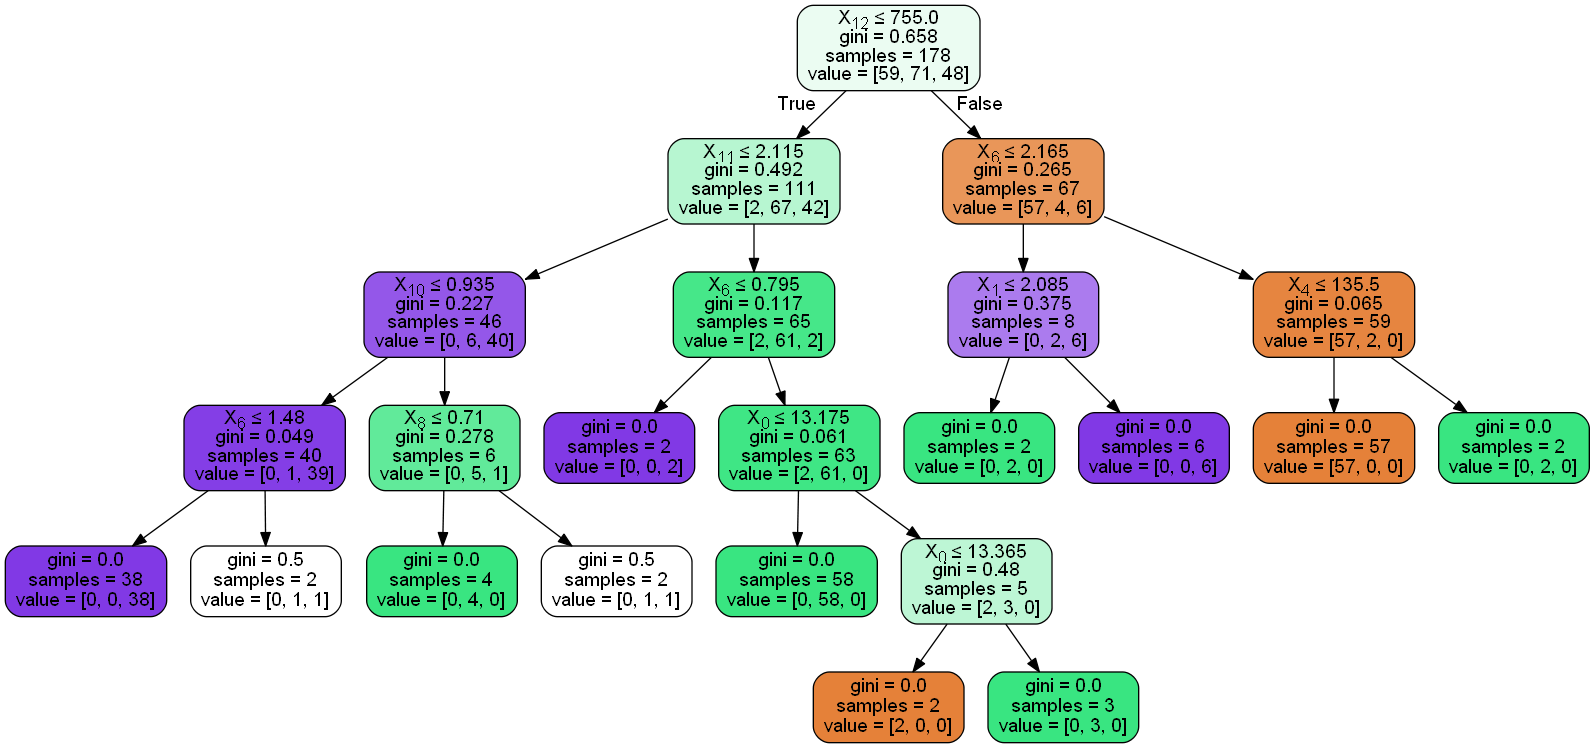

In [96]:
# 畫出決策樹
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(boston_dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [97]:
from sklearn.metrics import r2_score
print("訓練資料 r2 score:", r2_score(y_train,regr.predict(x_train)))
print("測試資料 r2 score:", r2_score(y_test,regr.predict(x_test)))

訓練資料 r2 score: 0.8098489809871977
測試資料 r2 score: 0.6933799598092029


1. r2 = 1，代表 res = 0，也就是你所有猜的數字都跟真正的數字一樣！
2. r2 = 0，代表 res = 1，也就是你所有猜的數字都是平均值！跟我們之前分類的時候 50% 50%
是一模一樣的意思

In [98]:
regr.feature_importances_

array([0.0400603 , 0.        , 0.        , 0.        , 0.01716588,
       0.62878011, 0.        , 0.06014874, 0.        , 0.        ,
       0.01975697, 0.        , 0.23408801])

觀察一下哪個特徵最重要，看起來跟我們一開始畫的圖大致符合，RM 的重要性最高 (0.6)，再
接下來是 LSTAT(0.2)